## STEP-1
### Reading and Understanding the data set

In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.shape

(730, 16)

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We have few unnecessary variables/columns in the given data set to perfom EDA and to build the model.So,let's try to drop/remove them.

From the above data set  we find that the variables/columns "instant","dteday","casual","registered".

Reasons:

1] instant - values are unique.

2] dteday  - this column is insignificant as most of the things are defined in other columns like             "yr","mnth","holiday","weekday","workingday".

3]"casual" and "registered" are target variables but we have "cnt" as target variable.

In [8]:
# Dropping unnecessary variables
df = df.drop(columns = ["instant","dteday","casual","registered"],axis =1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


There are certain columns with more number of categorical variables labeled as numbers.

Renaming those numbers with the objects can be helpful for futhur process in  modelling.

In [9]:
df["season"] = df["season"].apply(lambda  x:"spring" if x == 1
                   else "summer" if x == 2
                   else "fall" if x == 3
                   else "winter")

In [10]:
df["mnth"] = df["mnth"].apply(lambda  x:"January" if x == 1
                   else "February" if x == 2
                   else "March" if x == 3
                   else "April" if x == 4
                   else "May" if x == 5
                   else "June" if x == 6
                   else "July" if x == 7
                   else "August" if x == 8
                   else "September" if x == 9
                   else "October" if x == 10
                   else "November" if x == 11
                   else "December")

In [11]:
df["weekday"] = df["weekday"].apply(lambda  x:"Monday" if x == 1
                   else "Tuesday" if x == 2
                   else "Wednesday" if x == 3
                   else "Thursday" if x == 4
                   else "Friday" if x == 5
                   else "Saturday" if x == 6
                   else "Sunday")

In [12]:
df["weathersit"] = df["weathersit"].apply(lambda  x:"Clear" if x == 1
                   else "Mist & Cloudy" if x == 2
                   else "Light Snow & Rain" if x == 3
                   else "Heavy Rain & Ice Pallet")

In [13]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# Finding the correlations
df.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


We can see that "atemp" and "temp" are highly correlated.

As the correlation is very-high, we can eliminate anyone of the variable.

In [15]:
# Eliminating the "temp" column 
df.drop("temp",axis = 1,inplace = True) 
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist & Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist & Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,1600


# STEP-2
## Visualisation of the data set

In [16]:
# Importing libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

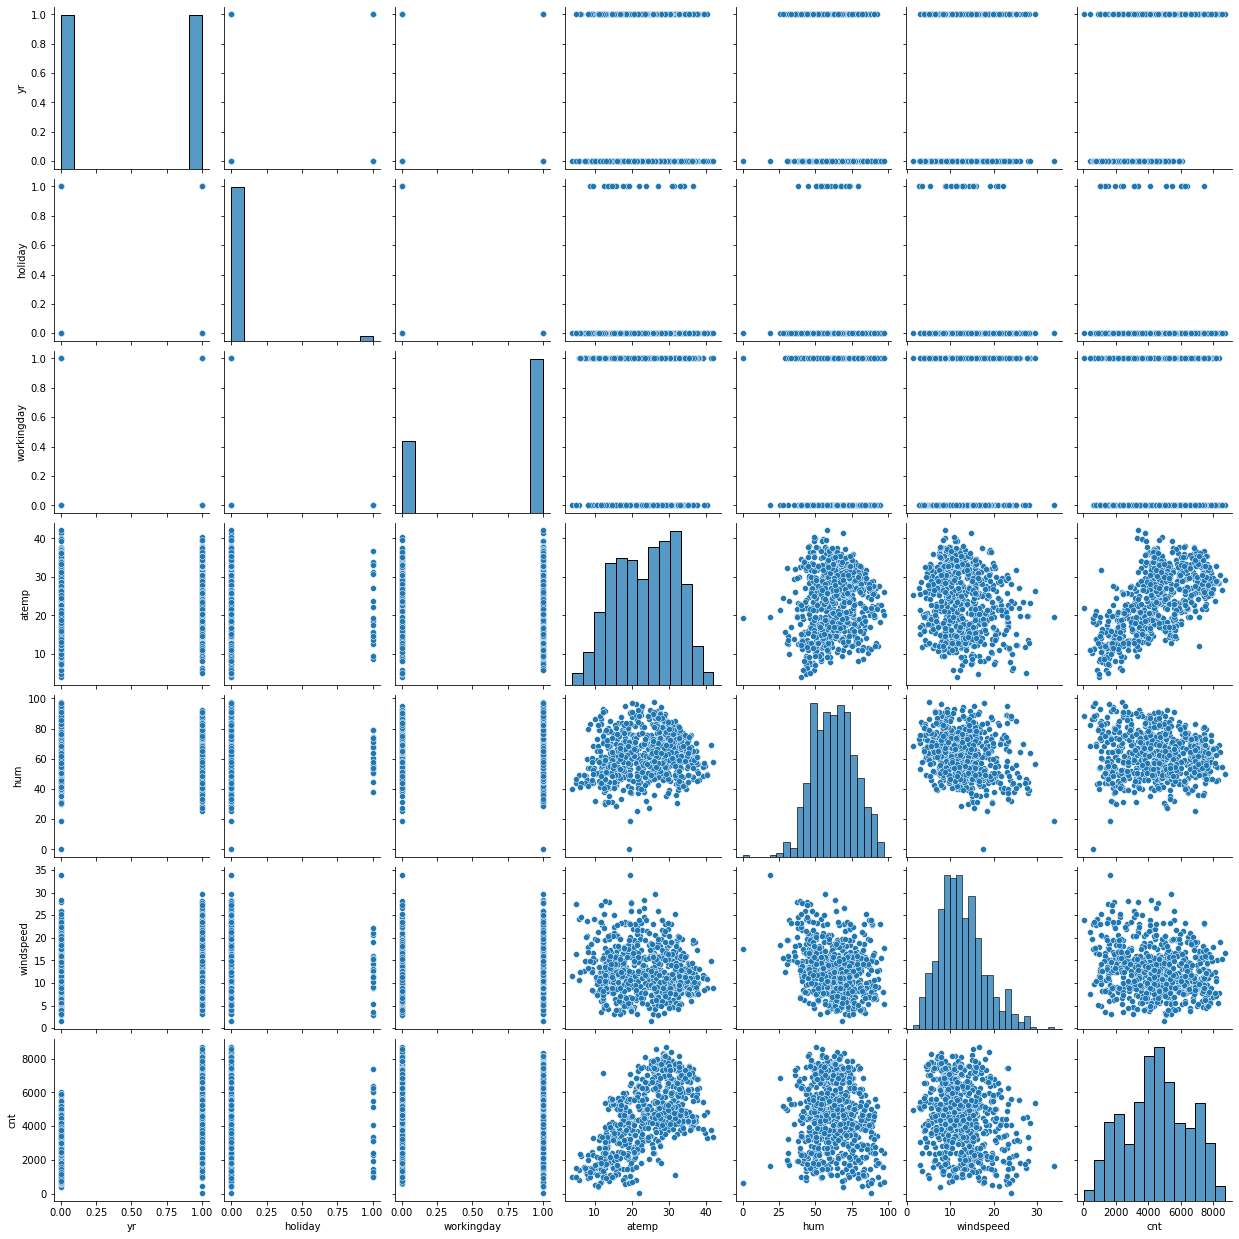

In [17]:
sns.pairplot(df)
plt.show()

### Visualising Categorical Variables:

#### As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables

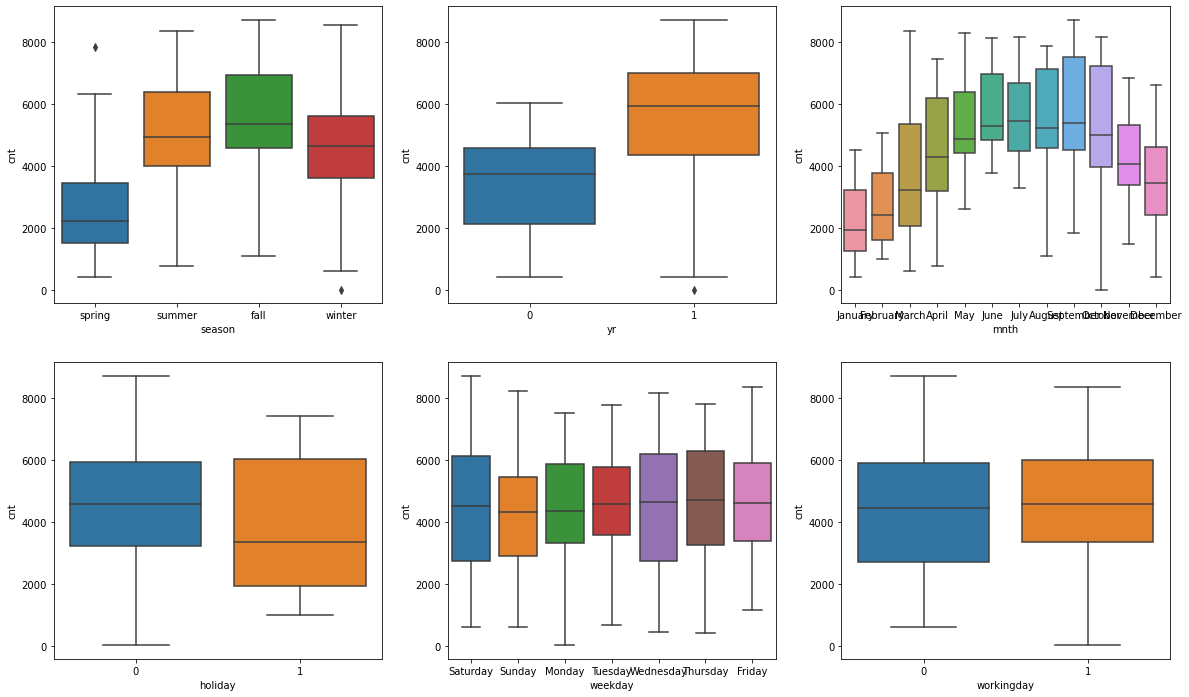

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()


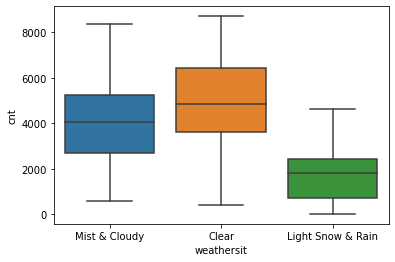

In [19]:
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

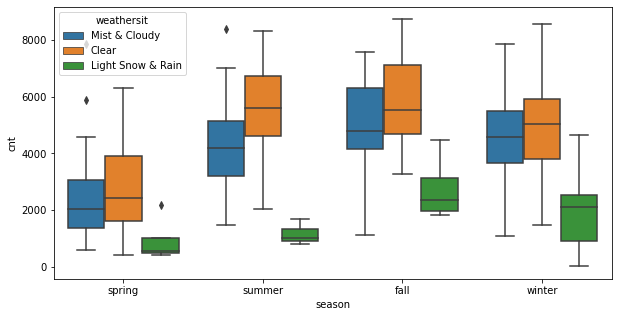

In [20]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = df)
plt.show()

1.The average count of total rental bikes including both casual and registered is high in the summer & fall when the weather is clear.

2.Bikes are rented least when there is light snow & rain.

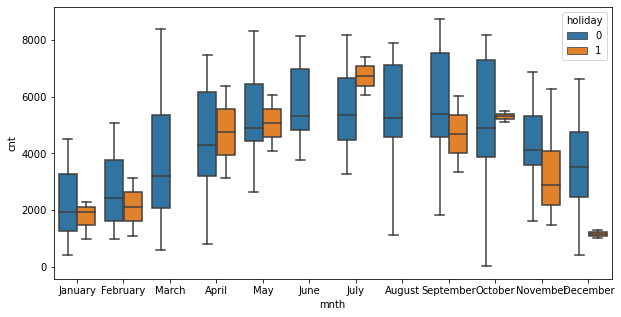

In [21]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'holiday', data = df)
plt.show()

There are more holidays in the months of April, May, July, September, October and November but bike are rented more in the months of April, September and November.

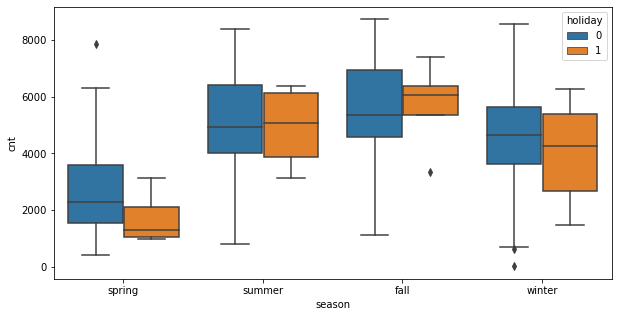

In [22]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'holiday', data = df)
plt.show()

The average count of total rental bikes including both casual and registered is high in the summer & winter when there is a holiday.

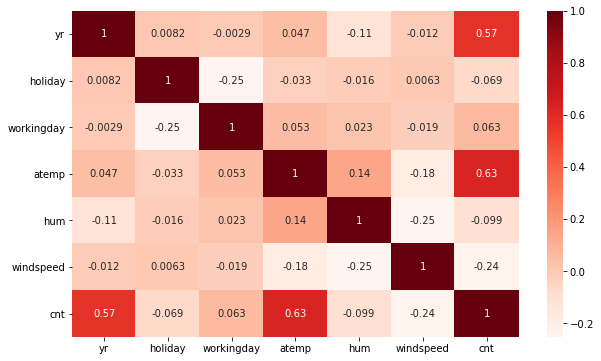

In [23]:
#plotting the correlations using heatmap
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot= True, cmap= "Reds")
plt.show()

# Step-3
## Data preparation

In the above steps we have already done categorizing the variables.

In this step,Let's find the dummy variables.

### Dummy Variables

The variables  "season", "mnth", "weekday", "weathersit" has various levels. We need to convert these levels into integer as well. 

In [24]:
# Get the dummy variables for the feature "season", "mnth", "weekday", "weathersit" and storing in the same dataset.
df = pd.get_dummies(df, columns = ["season", "mnth", "weekday", "weathersit"], drop_first = True)
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
df.shape

(730, 29)

# Step-4
## Splitting the Data into Training and Testing Sets

In [26]:
# Importing the Libraries
import sklearn
from sklearn.model_selection import train_test_split

In [27]:
# Dividing the data into train and test data using train_test_split from sklearn
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scaling:

We need to perform scaling for certain variables so that the variables are rescaled and they can have a comparable scales.

If we don't have comparable scales, then the coefficients obtained by fitting the regression model might be very large or very small as compared to the other coefficients and becomes exasperating at the time of model evaluation.

Let's perform MinMax scaling

In [28]:
# Library to be imported to perform MinMax scaling

from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

Applying scaler to the columns:"atemp","hum","windspeed","cnt".

In [30]:
scaling_vars = ["atemp","hum","windspeed","cnt"]

df_train[scaling_vars] = scaler.fit_transform(df_train[scaling_vars])

In [31]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [32]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that all the values lies in between 0 & 1

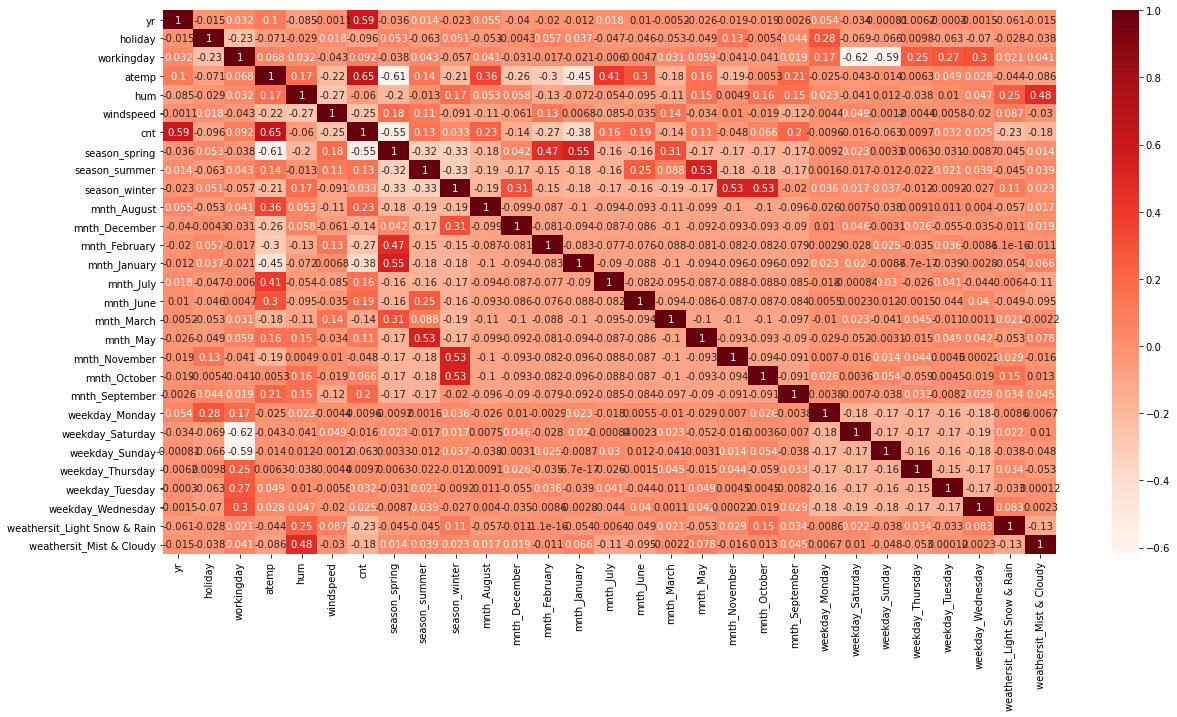

In [33]:
# Checking the correlation of the variables of train set using a heat-map
plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="Reds")
plt.show()

In [34]:
# Printing the correlations for variables with respect to "cnt" of train set

a = ["cnt","yr","holiday","workingday","atemp","hum","windspeed","season_spring","season_summer","season_winter","mnth_August","mnth_December","mnth_February","mnth_January","mnth_July","mnth_June","mnth_March","mnth_May","mnth_November","mnth_October","mnth_September","weekday_Monday","weekday_Saturday","weekday_Sunday","weekday_Thursday","weekday_Tuesday","weekday_Wednesday","weathersit_Light Snow & Rain","weathersit_Mist & Cloudy"]


for i in range(len(a)):
    print((str(a[i])+" = "+str(df_train['cnt'].corr(df_train[a[i]]))))

cnt = 1.0
yr = 0.5915080389399796
holiday = -0.09596100850177942
workingday = 0.09231969986231894
atemp = 0.646475242861109
hum = -0.05999334087885624
windspeed = -0.25379383357495994
season_spring = -0.5488707907661761
season_summer = 0.13434261207209935
season_winter = 0.032636063509074435
mnth_August = 0.22722944259382344
mnth_December = -0.14359840373840752
mnth_February = -0.27028702968689305
mnth_January = -0.37817313650045026
mnth_July = 0.15781222924716082
mnth_June = 0.1878211820030828
mnth_March = -0.137536723461121
mnth_May = 0.1130268393740107
mnth_November = -0.04813019820733066
mnth_October = 0.06569217858903863
mnth_September = 0.20132665479530282
weekday_Monday = -0.009551789031445726
weekday_Saturday = -0.016214929722312074
weekday_Sunday = -0.06338501289439767
weekday_Thursday = 0.009709935820571128
weekday_Tuesday = 0.031882903787118645
weekday_Wednesday = 0.02521555531232712
weathersit_Light Snow & Rain = -0.2265983584989191
weathersit_Mist & Cloudy = -0.17552959831

### Dividing the train set into X and y set for model building 

In [35]:
y_train = df_train.pop('cnt')
X_train = df_train

# Step-5
## Building our model

### RFE :

In [36]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', True, 1),
 ('mnth_August', False, 6),
 ('mnth_December', True, 1),
 ('mnth_February', False, 3),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 7),
 ('mnth_March', False, 14),
 ('mnth_May', False, 4),
 ('mnth_November', True, 1),
 ('mnth_October', False, 12),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 8),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1)]

In [39]:
supported_col = X_train.columns[rfe.support_]
supported_col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_December', 'mnth_January', 'mnth_July',
       'mnth_November', 'mnth_September', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy'],
      dtype='object')

In [40]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_August', 'mnth_February',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_October', 'weekday_Monday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics 

In [41]:
X_train_rfe = X_train[supported_col]

In [42]:
# Adding constant and running the model

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Fri, 12 Mar 2021   Prob (F-statistic):          9.67e-187
Time:                        21:26:13   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

weekday_Saturday is insignificant in presence of other variables as the p-value is high and can be dropped.

In [43]:
X_train_n = X_train_rfe.drop(["weekday_Saturday"], axis = 1)

Rebuilding the model without weekday_Saturday as we dropped it.

In [44]:
# Adding a constant variable and rerunning the model
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_n)

lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Fri, 12 Mar 2021   Prob (F-statistic):          2.58e-187
Time:                        21:26:13   Log-Likelihood:                 507.48
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     495   BIC:                            -921.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [45]:
# We need to drop "const" to perform futhur modelling

print("Before :")
print(X_train_n.columns)
X_train_n = X_train_n.drop(['const'], axis=1)
print("After dropping const :") 
print(X_train_n.columns)

Before :
Index(['const', 'yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_December', 'mnth_January', 'mnth_July',
       'mnth_November', 'mnth_September', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')
After dropping const :
Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_December', 'mnth_January', 'mnth_July',
       'mnth_November', 'mnth_September', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')


### Calculating the VIFs for the new model

In [46]:
# Importing VIF and finding the VIF's of variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_n
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.08
2,atemp,16.83
4,windspeed,4.00
6,season_winter,2.93
5,season_spring,2.89
13,weathersit_Mist & Cloudy,2.26
0,yr,2.06
10,mnth_November,1.82
8,mnth_January,1.75
7,mnth_December,1.54


1. VIF >= 5 is referred as high value we need to drop those values and the variables with VIF <= 2 are more preferable.

2. The variables should be dropped one by one.

In [47]:
# dropping the "hum" variable as VIF is very high

X_train_n = X_train_n.drop(['hum'], axis=1)

vif = pd.DataFrame()
X = X_train_n
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.57
3,windspeed,3.95
5,season_winter,2.55
4,season_spring,2.35
0,yr,2.06
9,mnth_November,1.80
7,mnth_January,1.65
12,weathersit_Mist & Cloudy,1.53
6,mnth_December,1.46
8,mnth_July,1.35


In [48]:
# As "atemp" is used for predictions, we move furthur by dropping "windspeed"

X_train_n = X_train_n.drop(['windspeed'], axis=1)

vif = pd.DataFrame()
X = X_train_n
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,3.05
4,season_winter,2.52
0,yr,2.05
3,season_spring,1.93
8,mnth_November,1.78
6,mnth_January,1.65
11,weathersit_Mist & Cloudy,1.52
5,mnth_December,1.46
7,mnth_July,1.33
9,mnth_September,1.20


We can see that the VIF value of "atemp" gradually decreasing.

In [49]:
# Similarly we drop "season_winter".

X_train_n = X_train_n.drop(['season_winter'], axis=1)

vif = pd.DataFrame()
X = X_train_n
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,2.94
0,yr,2.04
3,season_spring,1.82
5,mnth_January,1.63
10,weathersit_Mist & Cloudy,1.51
6,mnth_July,1.31
8,mnth_September,1.20
7,mnth_November,1.12
4,mnth_December,1.09
1,holiday,1.06


In [50]:
# Adding constants and running the model

X_train_lm = sm.add_constant(X)

lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     204.0
Date:                Fri, 12 Mar 2021   Prob (F-statistic):          1.74e-176
Time:                        21:26:13   Log-Likelihood:                 473.47
No. Observations:                 510   AIC:                            -922.9
Df Residuals:                     498   BIC:                            -872.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

We can see that the p-values of 'mnth_November' and 'mnth_December' have increased making them insignificant.

So, we drop them one by one

In [51]:
# Dropping 'mnth_November' variable and getting VIF's

X_train_n = X_train_n.drop(['mnth_November'], axis=1)

vif = pd.DataFrame()
X = X_train_n
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,2.91
0,yr,2.02
3,season_spring,1.80
5,mnth_January,1.63
9,weathersit_Mist & Cloudy,1.50
6,mnth_July,1.29
7,mnth_September,1.19
4,mnth_December,1.09
1,holiday,1.03
8,weathersit_Light Snow & Rain,1.03


In [52]:
# Adding constants and running the model

X_train_lm = sm.add_constant(X)

lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     224.7
Date:                Fri, 12 Mar 2021   Prob (F-statistic):          1.22e-177
Time:                        21:26:13   Log-Likelihood:                 473.39
No. Observations:                 510   AIC:                            -924.8
Df Residuals:                     499   BIC:                            -878.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

We can see that "mnth_December" is still having a high p-value even after dropping "mnth_November".

In [53]:
# Dropping "mnth_December" variable and getting VIF's

X_train_n = X_train_n.drop(['mnth_December'], axis=1)

vif = pd.DataFrame()
X = X_train_n
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,2.91
0,yr,2.01
3,season_spring,1.76
4,mnth_January,1.60
8,weathersit_Mist & Cloudy,1.49
5,mnth_July,1.29
6,mnth_September,1.18
1,holiday,1.03
7,weathersit_Light Snow & Rain,1.03


In [54]:
# Adding constants and running the model

X_train_lm = sm.add_constant(X)

lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     249.9
Date:                Fri, 12 Mar 2021   Prob (F-statistic):          9.21e-179
Time:                        21:26:13   Log-Likelihood:                 473.18
No. Observations:                 510   AIC:                            -926.4
Df Residuals:                     500   BIC:                            -884.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [55]:
X_train_n = X_train_n.drop(['mnth_January'], axis=1)

vif = pd.DataFrame()
X = X_train_n
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,2.87
0,yr,2.01
7,weathersit_Mist & Cloudy,1.47
4,mnth_July,1.29
3,season_spring,1.20
5,mnth_September,1.18
1,holiday,1.03
6,weathersit_Light Snow & Rain,1.03


In [56]:
# Adding constants and running the model

X_train_lm = sm.add_constant(X)

lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.2
Date:                Fri, 12 Mar 2021   Prob (F-statistic):          3.48e-179
Time:                        21:26:13   Log-Likelihood:                 471.26
No. Observations:                 510   AIC:                            -924.5
Df Residuals:                     501   BIC:                            -886.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Residual Analysis of the train data 

In [57]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

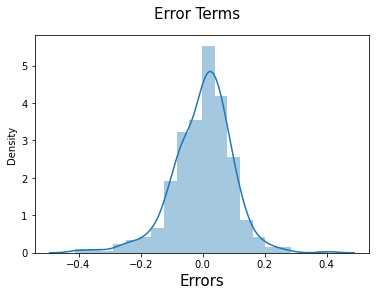

In [58]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 15) 

### Predicting the count

In [59]:
# Scaling the test sets

scaling_vars = ["atemp","hum","windspeed","cnt"]

df_test[scaling_vars] = scaler.transform(df_test[scaling_vars])

In [60]:
# Dividing into X_test and y_test

y_test = df_test.pop('cnt')
X_test = df_test

In [61]:
X_train_n.columns

Index(['yr', 'holiday', 'atemp', 'season_spring', 'mnth_July',
       'mnth_September', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [62]:
X_test_n = X_test[X_train_n.columns]

# Adding a constant variable 
X_test_n = sm.add_constant(X_test_n)

In [63]:
# Prediction
y_pred = lm.predict(X_test_n)

In [64]:
# Adding constants and running the model

X_test_lm = sm.add_constant(X_test_n)

lm = sm.OLS(y_test,X_test_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     115.0
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           1.99e-72
Time:                        21:26:13   Log-Likelihood:                 207.20
No. Observations:                 219   AIC:                            -396.4
Df Residuals:                     210   BIC:                            -365.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### We can see that the adjusted R-squared is similar for both train and test datasets

## Model Evaluation 

Text(0, 0.5, 'y_pred')

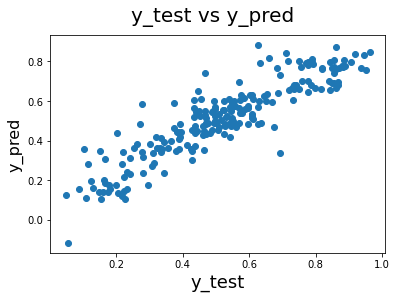

In [65]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

We can see that the equation of our best fitted line is:

$ cnt = 0.2458 * yr + (-0.0647) * holiday + 0.3775 * atemp + (-0.1904) * season_spring + (-0.0461) * mnth_July + 0.0439 * mnth_September + (-0.2479) * weathersit_Light Snow & Rain + (-0.0628) * weathersit_Mist & Cloudy $

### We can see that the variables like year, adjusted temperature(atemp), holiday has strong effect on target variable...